In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Resources

[OpenEI dataset](https://openei.org/doe-opendata/dataset/1be0a37f-28e5-4021-84bb-39a643250102/resource/bbeccdf5-301e-4390-b503-7d9f8d404986/download/wind50mresourcearea.xlsx)  
[DTU wind atlas](https://globalwindatlas.info/)

In [2]:
path='c:/Users/csala/OneDrive - Lancaster University/Datarepo/netset/db/maps/'

### Onshore

In [3]:
wind=pd.read_excel(path+'nrelwind.xlsx',sheet_name='Onshore Power',skiprows=2)
#http://en.openei.org/doe-opendata/dataset/c186913f-6684-4455-a2f2-f26e152a9b35/resource/4dc4a6fd-3a63-47df-bcbe-e9c83b83b38e/download/nrelcfddawindsc20130603.xlsx
wind_cap={}
for i in wind.T.iteritems():
    country=i[1][0]
    for k in range(1,10):
        if country not in wind_cap:wind_cap[country]={}
        clas=k
        cap=i[1][k] + i[1][k+10]# + i[1][k+20] #last one too far 0-50,50-100,100-5000
        wind_cap[country][clas]=cap/1000.0 #workbook reported values in GW, we use TW

In [5]:
wind=pd.read_excel(path+'nrelwind.xlsx',sheet_name='Onshore Energy',skiprows=2)
#http://en.openei.org/doe-opendata/dataset/c186913f-6684-4455-a2f2-f26e152a9b35/resource/4dc4a6fd-3a63-47df-bcbe-e9c83b83b38e/download/nrelcfddawindsc20130603.xlsx
wind_res={}
for i in wind.T.iteritems():
    country=i[1][0]
    for k in range(1,10):
        if country not in wind_res:wind_res[country]={}
        clas=k
        cap=i[1][k] + i[1][k+10]# + i[1][k+20] #last one too far 0-50,50-100,100-5000
        wind_res[country][clas]=cap*1000.0 #workbook reported values in PWh, we use TWh

Power

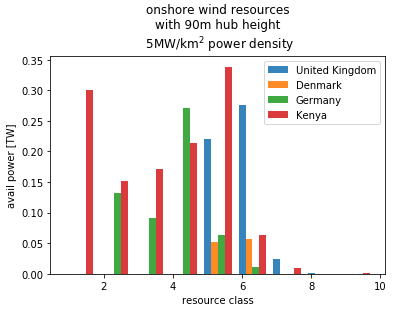

In [6]:
countries=['United Kingdom','Denmark','Germany','Kenya']
for i,country in enumerate(countries):
    plt.bar(np.array(list(wind_cap[country].keys()))+0.2*i,
            wind_cap[country].values(),alpha=0.9,width=0.2,label=country)
plt.ylabel('avail power [TW]')
plt.title('onshore wind resources\nwith 90m hub height\n 5MW/km$^2$ power density')
plt.xlabel('resource class')
plt.legend()

Capacity Factors

In [8]:
cf=pd.read_excel(path+'nrelwind.xlsx',sheet_name='General',skiprows=1)
cf=cf[['Wind Classes','Capacity Factor']][:9]
cf

,Wind Classes,Capacity Factor
0,c1,0-0.18
1,c2,0.18-0.22
2,c3,0.22-0.26
3,c4,0.26-0.3
4,c5,0.3-0.34
5,c6,0.34-0.38
6,c7,0.38-0.42
7,c8,0.42-0.46
8,c9,0.46-1.0


Energy

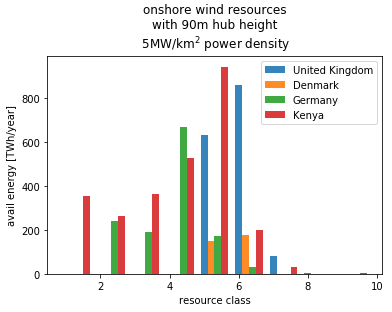

In [9]:
countries=['United Kingdom','Denmark','Germany','Kenya']
for i,country in enumerate(countries):
    plt.bar(np.array(list(wind_res[country].keys()))+0.2*i,
            wind_res[country].values(),alpha=0.9,width=0.2,label=country)
plt.ylabel('avail energy [TWh/year]')
plt.title('onshore wind resources\nwith 90m hub height\n 5MW/km$^2$ power density')
plt.xlabel('resource class')
plt.legend()

In [58]:
import plotly.plotly as py
import plotly.tools as tls

mpl_fig = plt.figure(figsize=(10,6))
ax = mpl_fig.add_subplot(111)
x=np.array(list(wind_res[country].keys()))
    
for i,country in enumerate(countries):
    y=wind_res[country].values()
    ax.bar(x,y,width=0.8)
ax.set_ylabel('Available energy [TWh/year]')
ax.set_xlabel('Resource class')
ax.set_title('Onshore wind resources')
plotly_fig = tls.mpl_to_plotly(mpl_fig)
for i,e in enumerate(plotly_fig['data']):
    e['name']=countries[i]
plotly_fig["layout"]["showlegend"] = True
py.iplot(plotly_fig, filename='mpl-basic-bar')

### Offshore

In [28]:
df=pd.read_excel('data/wind_farms_with_ws_2k_5k_sgouris edited.xlsx',sheetname='BASE')
df=df.dropna()
df=df.set_index(['ISO_CODE','Year'])
df=df[((df['POWER_KW'].replace('#ND',0).astype(int)>0)&\
       (df['POWER_KW'].replace('#ND',0).astype(int)<1000000)&(df['OFFSHORE']=='no'))]

/opt/conda/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


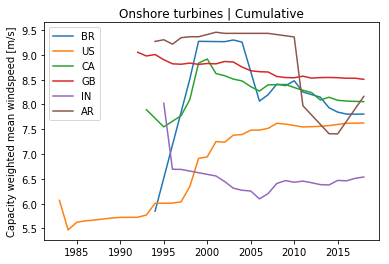

In [14]:
cs={'BR','AR','GB','CA','US','IN'}
for c in cs:
    x=[]
    y=[]
    z=[]
    for i in df.loc[c].sort_index().index.unique():
        x.append(i)
        dz=df.loc[c].loc[[k for k in df.loc[c].index.unique() if k<=i]]
        try:
            z.append(np.average(dz['WS_est'],weights=dz['POWER_KW'].astype(float).values))
        except:
            z.append(np.average(dz['WS_est']))
    #plt.plot(x,y,label=c)
    plt.plot(x,z,label=c)
plt.ylabel('Capacity weighted mean windspeed [m/s]')
plt.title("Onshore turbines | Cumulative")
plt.legend(loc=0)

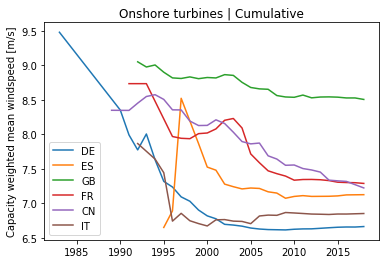

In [30]:
cs={'FR','DE','CN','IT','ES','GB'}
for c in cs:
    x=[]
    y=[]
    z=[]
    for i in df.loc[c].sort_index().index.unique():
        x.append(i)
        dz=df.loc[c].loc[[k for k in df.loc[c].index.unique() if k<=i]]
        try:
            z.append(np.average(dz['WS_est'],weights=dz['POWER_KW'].astype(float).values))
        except:
            z.append(np.average(dz['WS_est']))
    #plt.plot(x,y,label=c)
    plt.plot(x,z,label=c)
plt.ylabel('Capacity weighted mean windspeed [m/s]')
plt.title("Onshore turbines | Cumulative")
plt.legend(loc=0)

In [25]:
df=pd.read_excel('data/wind_farms_with_ws_2k_5k_sgouris edited.xlsx',sheetname='BASE')
df=df.dropna()
df=df.set_index('Year')
df=df[df['OFFSHORE']!='yes']

/opt/conda/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


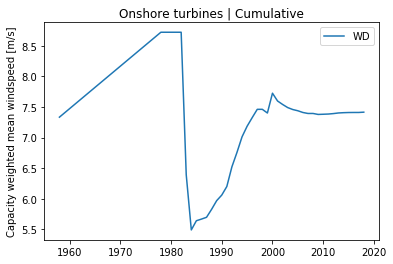

In [26]:
x=[]
y=[]
z=[]
for i in df.sort_index().index.unique():
    x.append(i)
    dz=df.loc[[k for k in df.index.unique() if k<=i]]
    try:
        z.append(np.average(dz['WS_est'],weights=dz['POWER_KW'].astype(float).values))
    except:
        z.append(np.average(dz['WS_est']))
plt.plot(x,z,label='WD')
plt.ylabel('Capacity weighted mean windspeed [m/s]')
plt.title("Onshore turbines | Cumulative")
plt.legend(loc=0)